# Dimension Reduction - 차원 축소

- 피처 선택(Feature selection)
- 피처 추출(Feature extraction)  

---

* 내가 기존에 알고있던 PCA의 방식은 Extraction이다.  
X1, X2....X10의 성분이 있을 때, 가장 밀집도가 높은 쪽으로의 방정식을 찾고,  
그것에 수직하는 선들 중 가장 밀집도가 높은 쪽으로의 방정식을 찾고....  
이렇게 새 방정식을 찾으니 X1, X2...X10이 Z1, Z2....식으로 바뀌게 된다.  
(Z1에 직교하는 Z2를 그리고, Z1, Z2에 직교하는 Z3를 그리고..  )  
Z1, 2, 3... 각각들은 모두 X1, 2, ... 10까지 다 쓴 거라.. Z1이 X1에서 나왔다고 생각하면 안 된다.  

* 통계에서의 요인 분석은 키와 관련된 컬럼 3개를 하나로 바꾸고, 몸무게 관련된 컬럼 3개를 하나로 바꾸고.. 식으로 축소시키는 건데, 이거랑 다른 개념이다.  
이 과정에서 사용되는 변환식을 변환 행렬이라고 한다. (Z1, Z2) = (w1, w2, w3, w4) *(내적) (X1, X2)   
결과물 중 가장 좋은 Z1, Z2, Z3를 주성분으로 한다.

* 물론 Z1, Z2...Z10까지도 있지만, Z2이후로 원 데이터의 특성을 포함하지 못하는 경우가 많다.  
아무래도 메인 방정식의 수직인 방정식을 짜다보니 단계가 거듭될수록 훅훅 떨어짐.  
Z2까지는 그래도 특성을 잘 표현하는 거 같으면, Z2까지만 쓰고, 거기를 elbow point라고 한다.  
이때, 이 가중치들을 eigen-value라고 한다.  

* Selection 방식은 기존의 x1, X2...X10 중에서 주요한 것 X1, X3, X5를 주성분으로 하는 방식이다.  

---

* 새 방정식이자 축을 그리는 방법으로는 분산이 가장 큰 방향으로 잡는다고 표현한다.  
이때, 분산인 공분산은 어떤 의미냐 하면..  

* (X-Xbar)(Y-Ybar)를 모든 값에 대하여 진행하여 원점이 0인 표준화를 해주고  
모든 값의 갯수인 N으로 나눠준 형태로 표현이 가능하다.  

* 데이터들이 1, 3사분면에 위치하면 ++, --로 곱하면 양수가 나오고,  
2, 4사분면이면 +-, -+로 곱하면 음수가 나온다.  

* 데이터가 1, 2사분면이면 ++. -+로 양수, 음수가 나와 더하면 감쇄한다.  
즉, 데이터가 1, 3 혹은 2, 4식으로 직선형으로 나오면 값이 1에 가까워지고,  
직선형이 아니라 흩뿌려 존재하면 값이 0에 가까워진다.  
(값이 -1~1사이에서 존재하기 위해 scaling을 진행하는데, 그 결과값을 상관계수라고 한다)

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## PCA(Principal Component Analysis) - 주성분 분석
[PCA](https://excelsior-cjh.tistory.com/167)

In [ ]:
!pip install mglearn

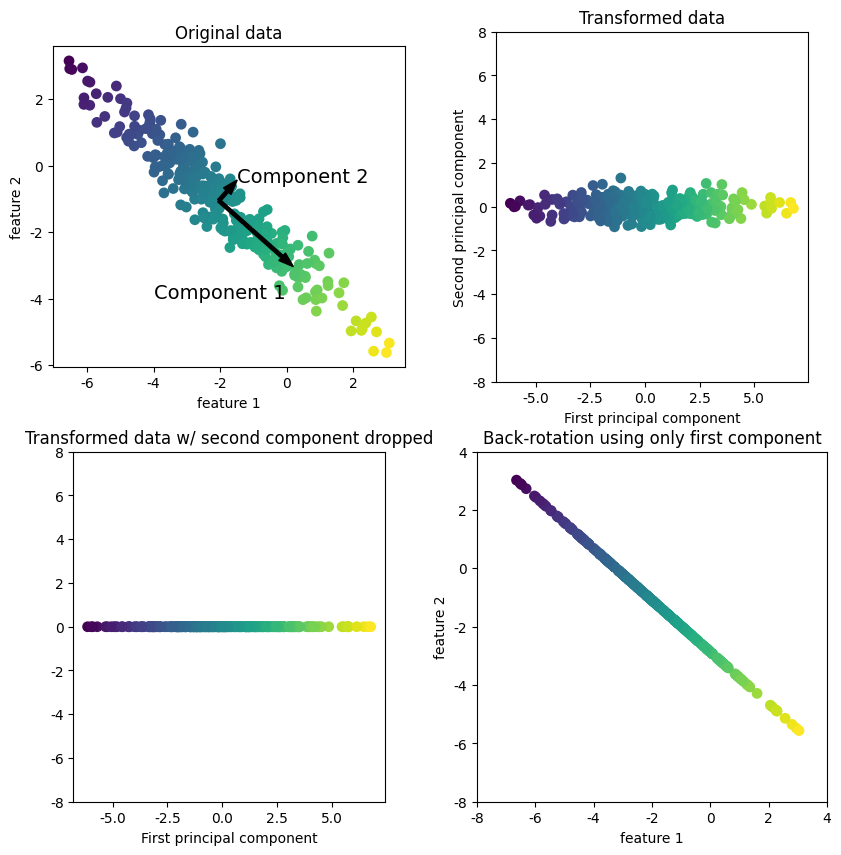

In [ ]:
import mglearn
mglearn.plots.plot_pca_illustration()

### PCA 적용 - 유방암 데이터 셋

#### 데이터 로딩 및 스케일링

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

#### PCA 적용

n-components를 10개로 주고 그 중에서 맨 앞 두개 뽑는거나, n을 2로 주는거나 똑같으니.. 일단 뽑고 그 중 갯수 골라서 쓰는 것도 괜찮아요.  

물론 n을 정해줌에 따라 달라지는 애들도 있어요. 고건 나중에 배워용(PCA 아님)  

In [ ]:
from sklearn.decomposition import PCA

# PCA 모델 생성 - 주성분 2개
pca = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca.fit(X_scaled)

# 데이터 변환(PCA 적용)
X_pca = pca.transform(X_scaled)

In [ ]:
print('원본 데이터 형태:', X_scaled.shape)
print('PCA 적용된 데이터 형태:', X_pca.shape)

원본 데이터 형태: (569, 30)
PCA 적용된 데이터 형태: (569, 2)


#### 성분과 정보

In [ ]:
pca.components_.shape

(2, 30)

아래 pca.components가 eigen vector이다.

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [ ]:
# 정보를 담고 있는 비율
pca.explained_variance_ratio_

#첫 번째 component가 전체의 44%, 두 번째 component가 전체의 18%를 담고있다는 뜻!

array([0.44272026, 0.18971182])

#### 주성분 2개로 데이터 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

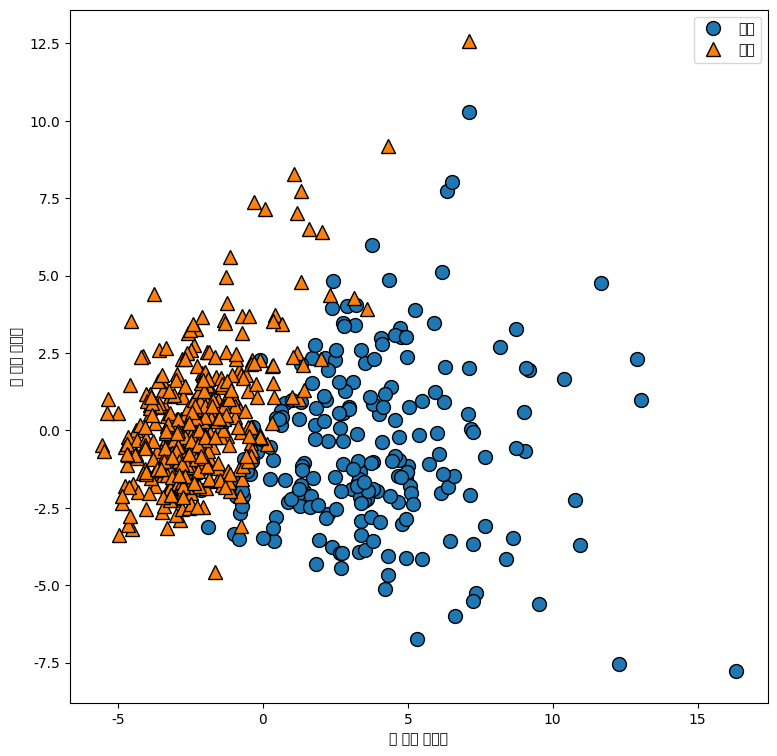

In [ ]:
plt.figure(figsize=(9, 9))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.legend(['악성', '양성'], loc='best')

plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

### PCA 적용 - Iris 데이터 셋

#### 데이터 로딩

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data , columns=iris.feature_names)
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 데이터 시각화

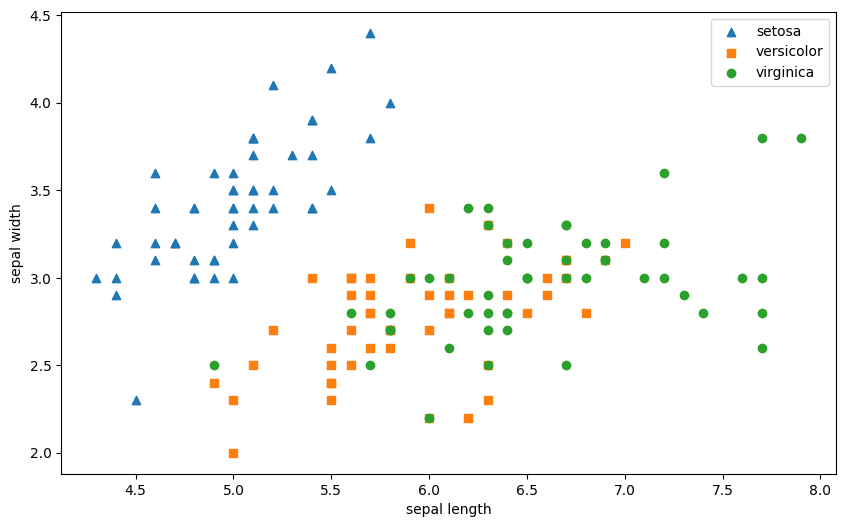

In [ ]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal length (cm)']
    y_axis_data = df[df['target']==i]['sepal width (cm)']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

#### 데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris.data)

#### PCA 적용

In [ ]:
from sklearn.decomposition import PCA

# PCA 모델 생성 - 주성분 2개
pca = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca.fit(iris_scaled)

# 데이터 변환(PCA 적용)
iris_pca = pca.transform(iris_scaled)

In [ ]:
print('원본 데이터 형태:', iris_scaled.shape)
print('PCA 적용된 데이터 형태:', iris_pca.shape)

원본 데이터 형태: (150, 4)
PCA 적용된 데이터 형태: (150, 2)


#### PCA 성분

In [ ]:
pca.components_.shape

(2, 4)

In [ ]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [ ]:
# 정보를 담고 있는 비율
pca.explained_variance_ratio_
# 두개만 해도 0.94를 커버

array([0.72962445, 0.22850762])

#### PCA 적용된 DataFrame 생성

In [ ]:
pca_columns=['pca_component_1','pca_component_2']

df_pca = pd.DataFrame(iris_pca, columns=pca_columns)

df_pca['target']=iris.target
df_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


#### PCA 적용된 데이터 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

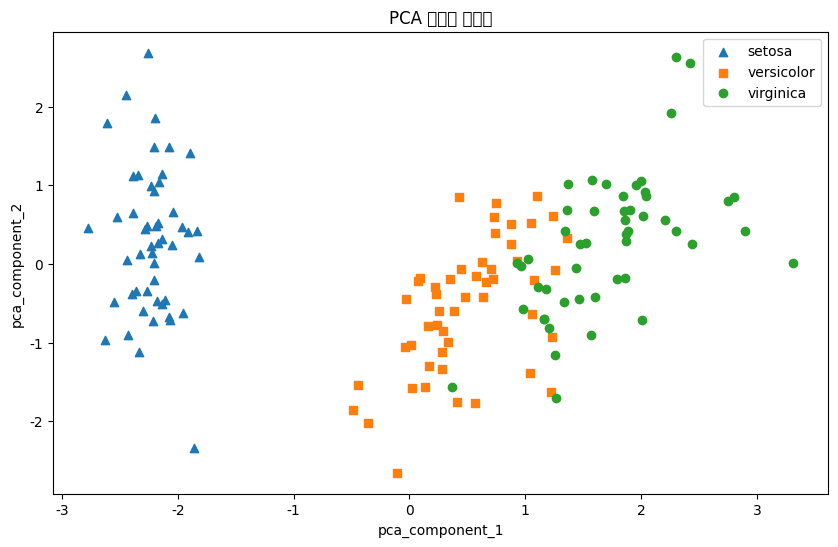

In [ ]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.title('PCA 적용된 데이터')
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.legend()
plt.show()

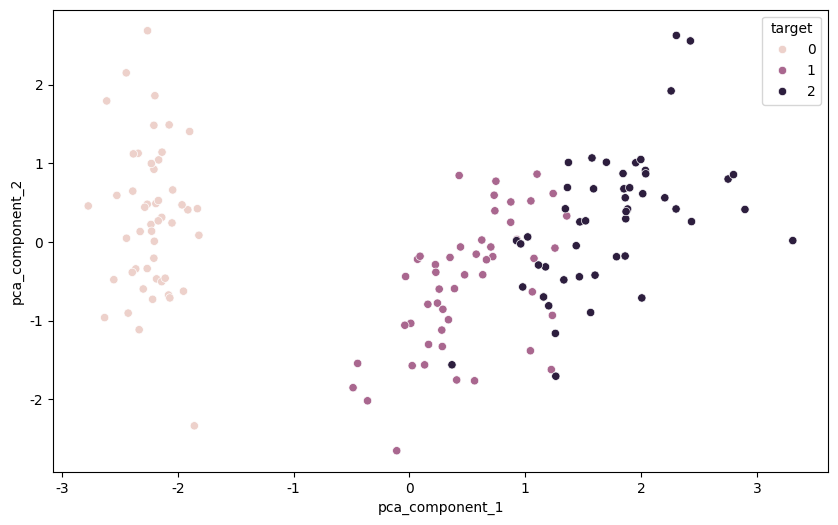

In [ ]:
# Visual Python: Visualization > Seaborn
sns.scatterplot(data=df_pca, x='pca_component_1', y='pca_component_2', hue='target')
plt.show()

#### 분류 예측: 원본 데이터 사용

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=123)

scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv=5)

print(scores)

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [ ]:
scores.mean()

0.96

#### 분류 예측: PCA 적용된 데이터 사용

In [ ]:
pca_X = df_pca[['pca_component_1', 'pca_component_2']]

scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=5)

print(scores_pca)

[0.83333333 0.93333333 0.83333333 0.9        1.        ]


In [ ]:
scores_pca.mean()

0.9

## LDA(Linear Discriminant Analysis) - 선형 판별 분석

#### LDA 적용 - fit 할 때 target을 주고 함  

PCA는 분산이 큰 쪽으로 선을 긋고, 얘는 target을 줬으니 잘 나누는 쪽으로 선을 그음

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA 모델 생성 - 주성분 2개
lda = LinearDiscriminantAnalysis(n_components=2)

# 모델 학습(규칙 설정) - target data 필요
lda.fit(iris_scaled, iris.target)

# 데이터 변환(LDA 적용)
iris_lda = lda.transform(iris_scaled)

In [ ]:
print('원본 데이터 형태:', iris_scaled.shape)
print('LDA 적용된 데이터 형태:', iris_lda.shape)

원본 데이터 형태: (150, 4)
LDA 적용된 데이터 형태: (150, 2)


#### LDA 적용된 DataFrame 생성

In [ ]:
lda_columns=['lda_component_1','lda_component_2']

df_lda = pd.DataFrame(iris_lda, columns=lda_columns)

df_lda['target']=iris.target
df_lda

,lda_component_1,lda_component_2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0
...,...,...,...
145,-5.645003,-1.677717,2
146,-5.179565,0.363475,2
147,-4.967741,-0.821141,2
148,-5.886145,-2.345091,2


#### LDA 적용된 데이터 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

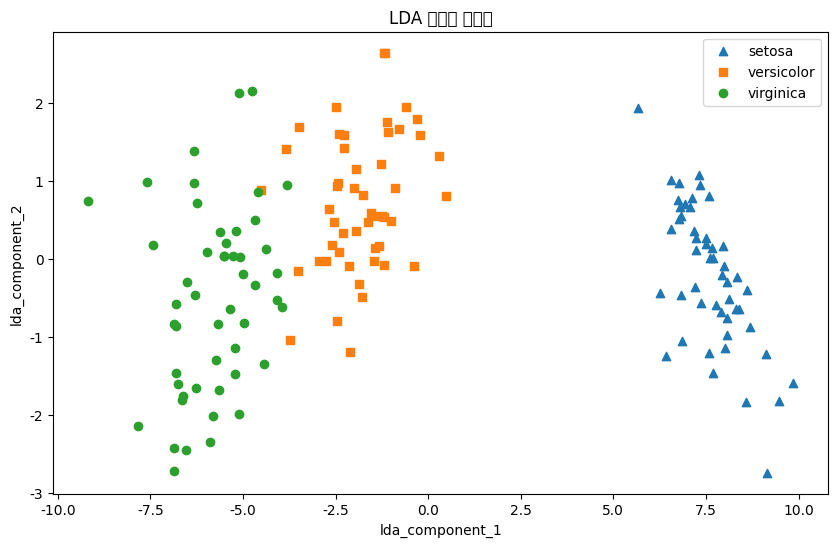

In [ ]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_lda[df_lda['target']==i]['lda_component_1']
    y_axis_data = df_lda[df_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.title('LDA 적용된 데이터')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.legend()
plt.show()

## SVD(Singular Value Decomposition) - 특이값 분해
[SVD](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/)

### SVD 를 이용한 행렬 분해

In [ ]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#### 데이터 생성

In [ ]:
np.random.seed(123)
matrix = np.random.random((6, 6))

print('원본 행렬:\n',matrix)

원본 행렬:
 [[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426 0.73799541 0.18249173 0.17545176]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.09210494 0.43370117 0.43086276 0.4936851  0.42583029 0.31226122]]


#### SVD 행렬 분해

In [ ]:
U, Sigma, Vt = svd(matrix, full_matrices=False)

print('분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('Sigma 행렬:', Sigma)

분해 행렬 차원: (6, 6) (6,) (6, 6)
Sigma 행렬: [2.96576731 0.78175158 0.47718381 0.4139116  0.16509625 0.00944651]


#### Truncated SVD 행렬 분해

In [ ]:
# 특이값: 4
num_components = 4

U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)

print('Truncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('Truncated SVD Sigma 행렬:', Sigma_tr)

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)
Truncated SVD Sigma 행렬: [0.4139116  0.47718381 0.78175158 2.96576731]


#### Truncated SVD 행렬 분해 복원

In [ ]:
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)

print('Truncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

Truncated SVD로 분해 후 복원 행렬:
 [[0.68906014 0.26490088 0.23669976 0.54614844 0.72223848 0.4438814 ]
 [0.96118934 0.62438864 0.51288071 0.37498112 0.35259768 0.78422808]
 [0.43656134 0.05465804 0.39969737 0.73719293 0.18288177 0.18104036]
 [0.54152634 0.55770951 0.6248567  0.85420284 0.72204393 0.58323575]
 [0.74889254 0.40545564 0.31748323 0.25208612 0.28058325 0.55636452]
 [0.08740285 0.42368389 0.43237132 0.49319468 0.42590656 0.32521354]]


###  scikit-learn TruncatedSVD 적용 - Iris 데이터 셋

#### TruncatedSVD 적용

In [ ]:
# Visual Python: Machine Learning > Dimension
from sklearn.decomposition import TruncatedSVD

model_SVD11 = TruncatedSVD()

In [ ]:
# Visual Python: Machine Learning > Fit/Predict
iris_scaled = model_SVD11.fit_transform(iris.data)
iris_scaled

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD 모델 생성 - 주성분 2개
tsvd = TruncatedSVD(n_components=2)

# 모델 학습(규칙 설정)
tsvd.fit(iris.data)

# 데이터 변환(SVD 적용)
iris_tsvd = tsvd.transform(iris.data)

#### SVD 적용된 데이터 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

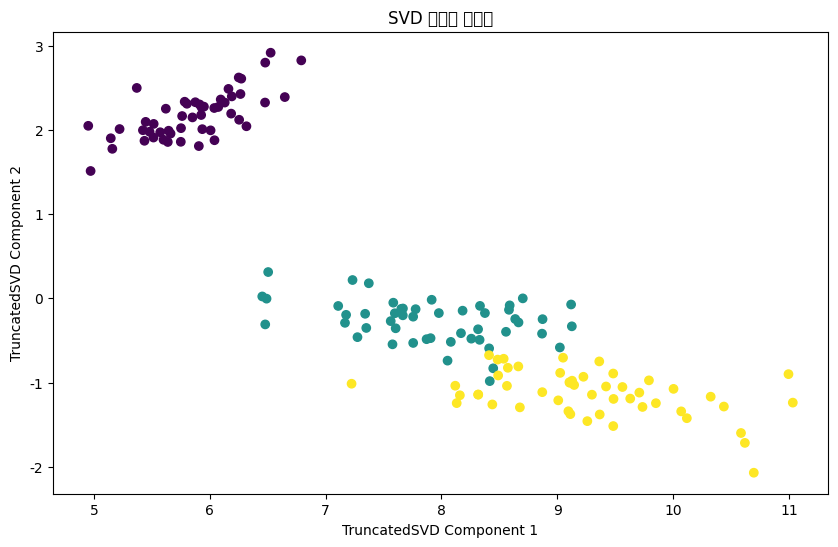

In [ ]:
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)

plt.title('SVD 적용된 데이터')
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

#### PCA - SVD 비교
- Scaled data -> 결과 동일
- PCA: 밀집 행렬에 적용
- SVD: 희소 행렬에도 적용 가능

In [ ]:
# PCA
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# SVD
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

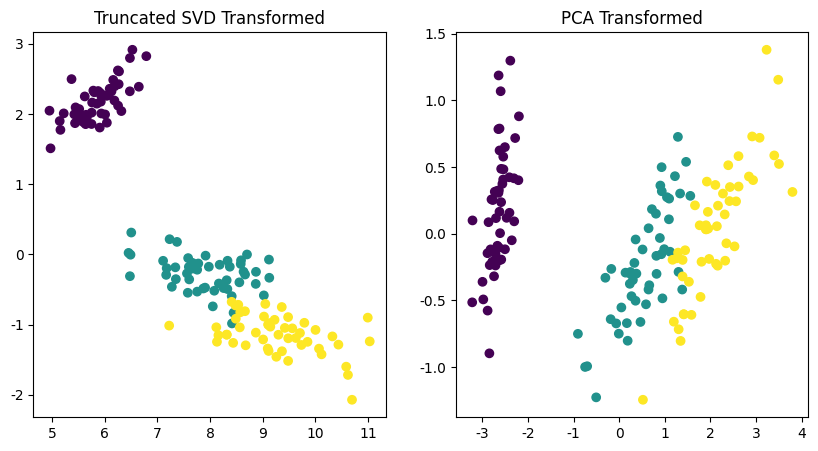

In [ ]:
# PCA - SVD 시각화

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2)

ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)

ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
plt.show()

## NMF(Non-Negative Matrix Factorization) - 비음수 행렬 분해
[NMF](https://ssung-22.tistory.com/87)
- 하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 직선을 그림
- 성분의 개수를 바꾸면 전체 성분이 완전히 바뀜(성분 2개 하면 제일 잘 표현한 평균으로 직선 하나, 그 다음으로 직선 하나)
- 모든 성분을 동등하게 취급

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


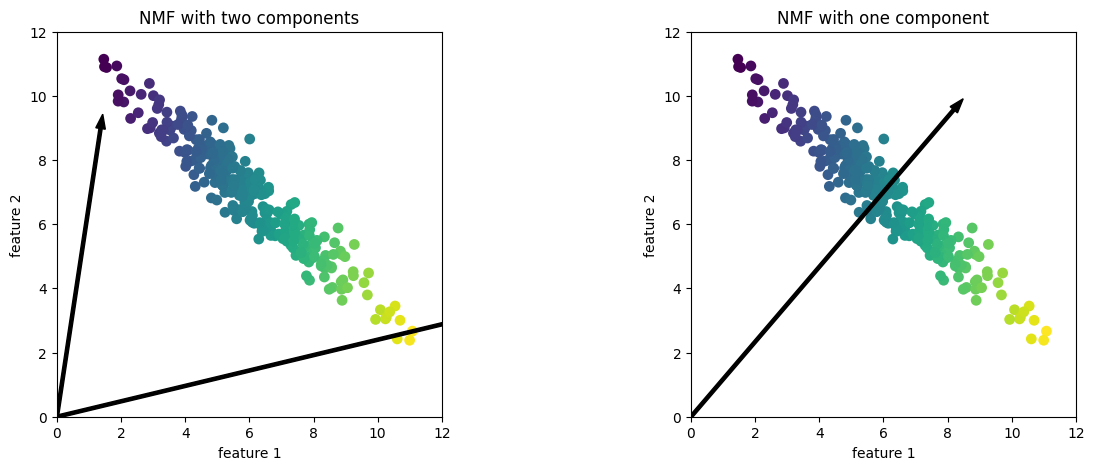

In [ ]:
mglearn.plots.plot_nmf_illustration()

### NMF 적용 - Iris 데이터 셋

#### NMF 적용

In [ ]:
from sklearn.decomposition import NMF

# NMF 모델 생성 - 성분 2개
nmf = NMF(n_components=2, init='nndsvda', max_iter=500)

# 모델 학습(규칙 설정)
nmf.fit(iris.data)

# 데이터 변환(NMF 적용)
iris_nmf = nmf.transform(iris.data)

In [ ]:
print('원본 데이터 형태:', iris.data.shape)
print('NMF 적용된 데이터 형태:', iris_nmf.shape)

원본 데이터 형태: (150, 4)
NMF 적용된 데이터 형태: (150, 2)


#### NMF 적용된 데이터 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

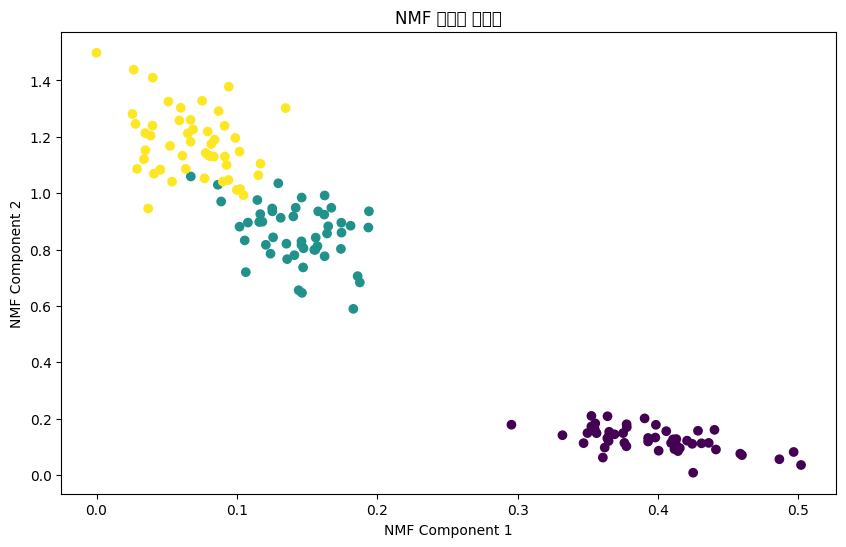

In [ ]:
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)

plt.title('NMF 적용된 데이터')
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

## t-SNE(t-Distributed Stochastic Neighbor Embedding)

복잡한 데이터의 차원을 축소시켜 그림을 그리고 싶을 때 PCA보다 이게 더 많이 쓰인다고 한다.

### 데이터 로딩

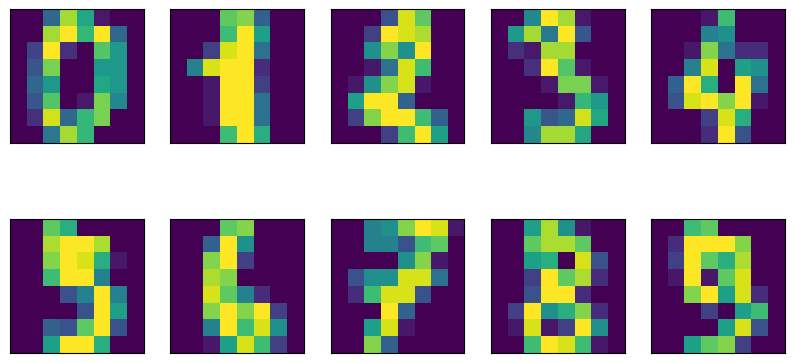

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

숫자가 적힌 그림은 8x8 픽셀이다. 이걸 한줄로 쭉 펴서 64열을 만든다. 타겟 컬럼을 추가하고, 그 한 행 64열의 데이터가 어떤 숫자를 의미한 건지 정답을 알려준다.  

### PCA 적용: 2개의 성분으로 시각화

#### PCA 적용

In [ ]:
from sklearn.decomposition import PCA

# PCA 모델 생성 - 주성분 2개
pca = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca.fit(digits.data)

# 데이터 변환(PCA 적용)
digits_pca = pca.transform(digits.data)

#### PCA 적용 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

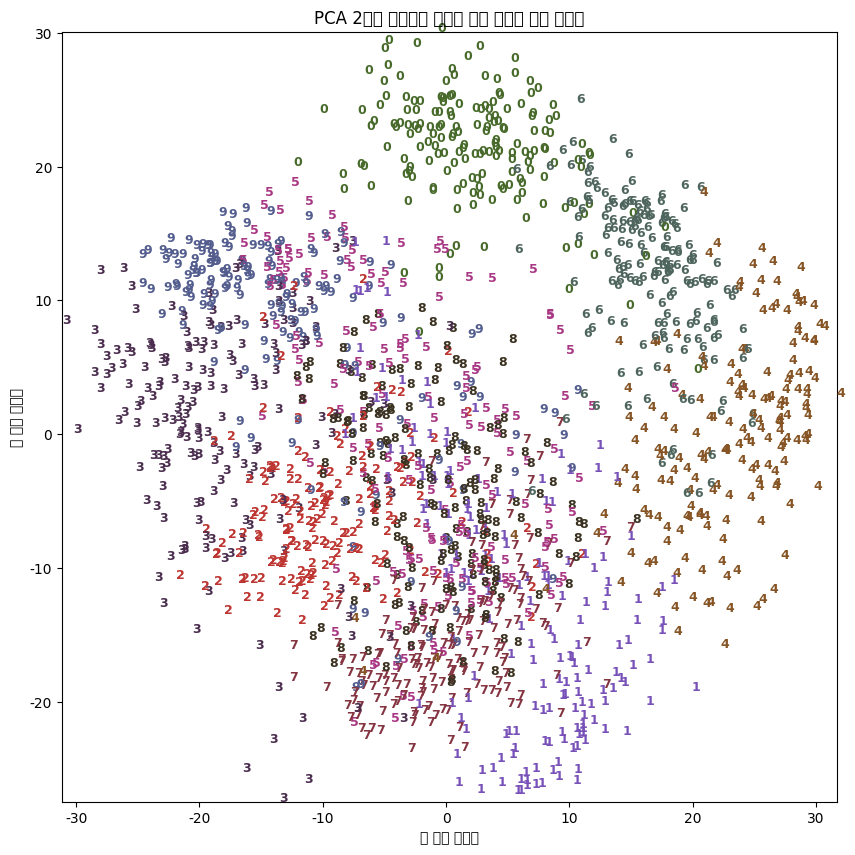

In [ ]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

plt.title('PCA 2개의 주성분을 사용한 숫자 데이터 셋의 산점도')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

component가 64개 씩이나 되는데 거기서 n개로 줄여봤자 잘 할리가 없다. 위 그림만 봐도 그렇다

### t-SNE 적용: 2개의 성분으로 시각화

#### t-SNE 적용

In [ ]:
from sklearn.manifold import TSNE

# t-SNE 모델 생성
tsne = TSNE(learning_rate='auto', random_state=123)

# 모델 학습(규칙 설정) 및 데이터 변환(t-SNE 적용)
digits_tsne = tsne.fit_transform(digits.data)

#### t-SNE 적용 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52286 (\N{HANGUL SYLLABLE CAJ}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

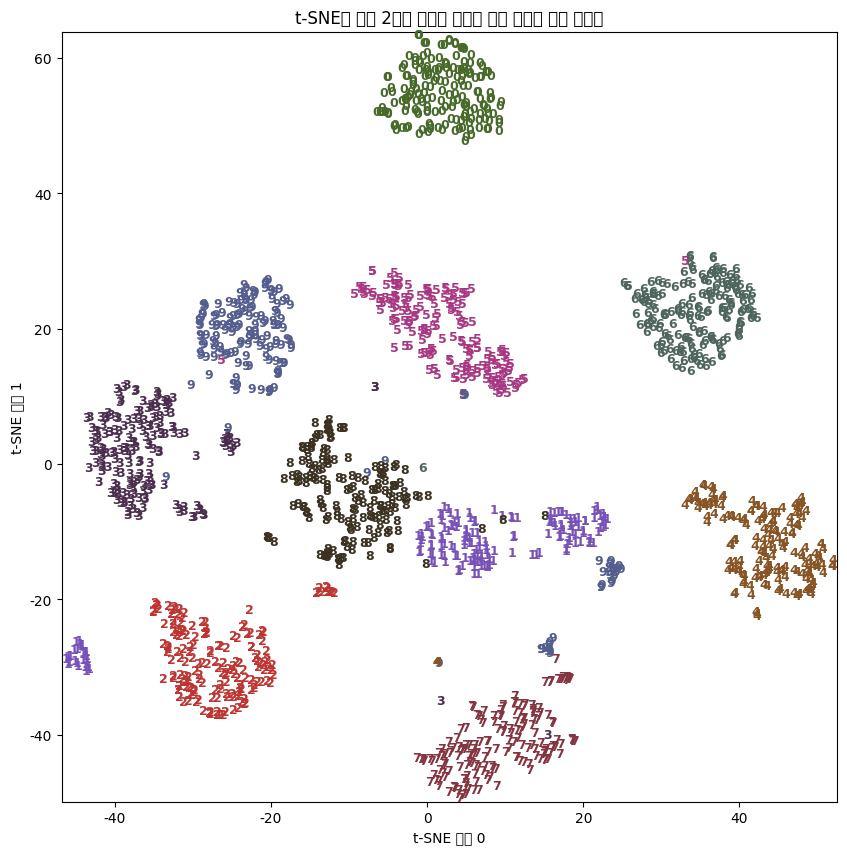

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

plt.title('t-SNE로 찾은 2개의 성분을 사용한 숫자 데이터 셋의 산점도')
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')
plt.show()

In [ ]:
# Visual Python: Machine Learning > Dimension
from sklearn.manifold import TSNE

tsne = TSNE(random_state=123)

In [ ]:
# Visual Python: Machine Learning > Fit/Predict
digits_tsne = tsne.fit_transform(digits.data)
digits_tsne

array([[ -3.0438168,  53.7929   ],
       [ 10.448235 , -11.313315 ],
       [-13.469272 , -18.614388 ],
       ...,
       [ -5.7594314, -10.625336 ],
       [-20.788189 ,  14.848009 ],
       [-13.915374 ,  -7.0292974]], dtype=float32)

---

In [ ]:
# End of file